# **INFO5731 In-class Exercise 4**
**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

**Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks.**

**Expectations:**

Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
Use the provided .ipynb document to write your code & respond to the questions. Avoid generating a new file.
Write complete answers and run all the cells before submission.
Make sure the submission is "clean"; i.e., no unnecessary code cells.
Once finished, allow shared rights from top right corner (see Canvas for details).

**Total points:** 40

**Deadline:** This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving email-spam.csv to email-spam.csv


In [ ]:
import pandas as pd
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
!pip install pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from gensim.models import LsiModel
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
!pip install BERTopic
warnings.filterwarnings("ignore",category=DeprecationWarning)
df = pd.read_csv('email-spam.csv')
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 30.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━

text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]

In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = df.drop_duplicates(ignore_index=True)

In [ ]:
stop_word = stopwords.words('english')
stop_word += ['com', 'ect', 'www', 'email', 'one', 'two', 'shall', 'will','muzo','edt','cds','sav','ong','vnbl','pll','dik','btu','shl','wiil','eet','mmjx','spfa','may','could','like','may','hou','edu','ees','also','let','get','much','give','make','want','know','http','would','take','need']
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(text): #text cleaning
    text = text.lower() #text lowering
    text = text.split(":", 1)[1]
    tokenzie_text = word_tokenize(text)
    without_punt = [word for word in tokenzie_text if word not in string.punctuation] #removing puctuncations
    without_stop_w = [word for word in without_punt if word not in stop_word] # removing stop_words
    without_num = []
    for word in without_stop_w: #forloop for removing the digits
        if word.isdigit():
            continue
        if word.isalnum():
            word = list(word)
            words = [i for i in word if i not in p]
            word = ''.join(words)
            without_num.append(word)
        else:
            without_num.append(word)
    without_len1_2 = [word for word in without_num if len(word) >=3]
    return without_len1_2

In [ ]:
df['text'] = df['text'].apply(text_manipulation)

<ipython-input-6-298bc34fbe5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(text_manipulation)


In [ ]:
vocubulary = list()
for word_list in df['text']: #for loop for getting the count of each words
   vocubulary.append(word_list)

In [ ]:
id2word = corpora.Dictionary(list(vocubulary))

# Create Corpus
texts = vocubulary

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 3), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 1)]]


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# the below code is referendce from  https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ . In this link they use mallet version for getting k value based on coherence score but here i am using differet lda from genism

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    c_v = []
    m_l = []
    for k in range(start, limit, step):
        model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics= k,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        m_l.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(coherencemodel.get_coherence())

    return m_l, c_v

In [ ]:
m_l, c_v = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=vocubulary, start=2, limit=40, step=6)

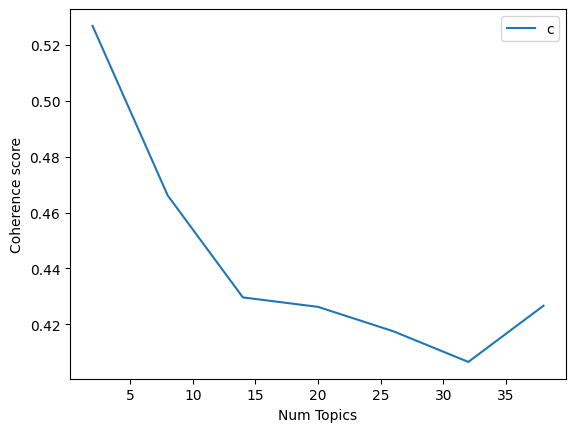

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
i = 0
for k in range(start, limit, step):
  print("Model : "+str(i))
  print("k-value : "+str(k))
  print('Perplexity: ', m_l[i].log_perplexity(corpus))
  print('Coherence Score: ', c_v[i])
  print('*'*10)
  i+=1

Model : 0
k-value : 2
Perplexity:  -8.463435341301176
Coherence Score:  0.5268075969098509
**********
Model : 1
k-value : 8
Perplexity:  -8.720829059361469
Coherence Score:  0.46610448148245487
**********
Model : 2
k-value : 14
Perplexity:  -12.128049719320536
Coherence Score:  0.4296068978213201
**********
Model : 3
k-value : 20
Perplexity:  -17.727872045652916
Coherence Score:  0.4262137444024682
**********
Model : 4
k-value : 26
Perplexity:  -20.380044831279655
Coherence Score:  0.41750112135491096
**********
Model : 5
k-value : 32
Perplexity:  -23.003772194868954
Coherence Score:  0.4065057988426221
**********
Model : 6
k-value : 38
Perplexity:  -25.745418950096717
Coherence Score:  0.4266280221412067
**********


From the graph and the above printed score it is observed that the model 0 with k =2 is good for model building hignher the coherence score better the model interpretibility so we choose k =2

In [ ]:
model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 2,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.165299  0.0       1        1  55.387651
1     -0.165299  0.0       2        1  44.612349, topic_info=              Term          Freq         Total Category  logprob  loglift
16909        enron  14703.000000  14703.000000  Default  30.0000  30.0000
13153        vince   8675.000000   8675.000000  Default  29.0000  29.0000
17029     kaminski   4735.000000   4735.000000  Default  28.0000  28.0000
767        subject   4452.000000   4452.000000  Default  27.0000  27.0000
1425        thanks   2667.000000   2667.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
195          order    618.093179    869.239213   Topic2  -6.2020   0.4662
3118       options    681.920811   1146.150832   Topic2  -6.1037   0.2879
56      management    772.470888   1722.037226   Topic2  -5.9790   0.0055
1193   development    748.458025   1636.139918   Topic2  -6.0106   0.0251
153         credit    642.609661   1063.364573   Topic2  -6.1631   0.3035

[161 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4185      1  0.003791   american
4185      2  0.993316   american
1166      1  0.201595   analysis
1166      2  0.798627   analysis
291       1  0.004364     assets
...     ...       ...        ...
6903      2  0.998555  wholesale
1773      1  0.876345       work
1773      2  0.123429       work
1048      1  0.424318       year
1048      2  0.575708       year

[246 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [ ]:
model_topics = model.show_topics(formatted=False)
for i in model_topics:
  print(i)

(0, [('enron', 0.038802747), ('vince', 0.02289654), ('kaminski', 0.012496456), ('subject', 0.011727965), ('please', 0.011048225), ('research', 0.007163964), ('thanks', 0.00703887), ('group', 0.0059785135), ('time', 0.005303451), ('corp', 0.0049937777)])
(1, [('power', 0.0076517775), ('energy', 0.006284678), ('new', 0.0056270827), ('market', 0.005453519), ('price', 0.004993964), ('model', 0.0046635815), ('gas', 0.004494647), ('risk', 0.0042584897), ('business', 0.0034846494), ('data', 0.0032819272)])


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    c_v = []
    m_l = []
    for k in range(start, limit, step):
        model = LsiModel(doc_term_matrix, num_topics=k, id2word = dictionary)
        m_l.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        c_v.append(coherencemodel.get_coherence())

    return m_l, c_v

In [ ]:
m_l, c_v = compute_coherence_values(id2word, corpus, vocubulary,  stop=40,start=2, step=6)

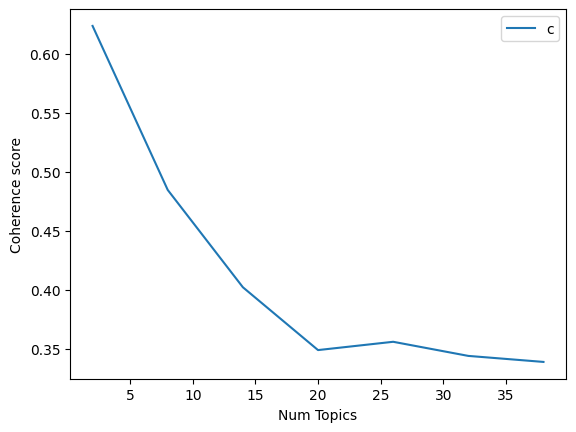

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
i = 0
for k in range(start, limit, step):
  print("Model : "+str(i))
  print("k-value : "+str(k))
  print('Coherence Score: ', c_v[i])
  print('*'*10)
  i+=1

Model : 0
k-value : 2
Coherence Score:  0.6234943235435249
**********
Model : 1
k-value : 8
Coherence Score:  0.4845094510474525
**********
Model : 2
k-value : 14
Coherence Score:  0.40203444148205836
**********
Model : 3
k-value : 20
Coherence Score:  0.34879262201079464
**********
Model : 4
k-value : 26
Coherence Score:  0.3558229132449498
**********
Model : 5
k-value : 32
Coherence Score:  0.34385658434369915
**********
Model : 6
k-value : 38
Coherence Score:  0.338758920857475
**********


From the graph and the above printed score it is observed that the model 0 with k =2 is good for model building hignher the coherence score better the model interpretibility so we choose k =2

In [ ]:
model = LsiModel(corpus, num_topics=2, id2word = id2word)

In [ ]:
model_topics = model.show_topics(formatted=False)
for i in model_topics:
  print(i)

(0, [('enron', -0.815125171823131), ('vince', -0.17659477652089886), ('power', -0.1576041606055771), ('dpc', -0.12289469406273502), ('kaminski', -0.11158951289057986), ('mseb', -0.1034073990844521), ('subject', -0.10085747134575217), ('project', -0.09911914957191713), ('state', -0.0970069664935636), ('communications', -0.09657977834597932)])
(1, [('power', 0.3384647554568133), ('enron', -0.32914952073593595), ('dpc', 0.3168460381068961), ('mseb', 0.2722208841502442), ('state', 0.24809140662442758), ('project', 0.20992531662301434), ('board', 0.19797195566421652), ('said', 0.18713595533070004), ('vince', -0.16375058842513168), ('termination', 0.1593107268024134)])


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
def text_mani(x):
  s = ''
  for i in x:
    s=s+" "+i
  return s

In [ ]:
df['text'] = df['text'].apply(text_mani)

<ipython-input-36-35cf2ca8566d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(text_mani)


In [ ]:
#!pip install pyLDAvis
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(df['text']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [i.strip()[:35] for i in df["text"]]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Topic 2297 naturally irresistible corporate id stock trading gunslinger fanny merr unbelievable new homes made easy wa color printing special request addi money software software compatibili great nnews hello welcome medzonlin hot play motion homeland security i save money buy getting thing tried  undeliverable home based business g save money buy getting thing tried  las vegas high rise boom las vegas  save money buy getting thing tried  brighten teeth teeth bright white c wall street phenomenon reaps reward fpa notice ebay misrepresentation i search engine position first listin software guaranteed legal name bran localized software languages availa security alert confirm national cre century web specialists jrgbm dear  med girl happy girl unsatisfied pot wearable electronics name jason rec top level logo business identity co trusted source prescription medicat rely online prescription ordering h guzzle fountain spur rocks customer losing answer amaze connecting busi save improper med

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Topic 5008 naturally irresistible corporate id stock trading gunslinger fanny merr unbelievable new homes made easy wa color printing special request addi money software software compatibili great nnews hello welcome medzonlin hot play motion homeland security i save money buy getting thing tried  undeliverable home based business g save money buy getting thing tried  las vegas high rise boom las vegas  save money buy getting thing tried  brighten teeth teeth bright white c wall street phenomenon reaps reward fpa notice ebay misrepresentation i search engine position first listin software guaranteed legal name bran localized software languages availa security alert confirm national cre century web specialists jrgbm dear  med girl happy girl unsatisfied pot wearable electronics name jason rec top level logo business identity co trusted source prescription medicat rely online prescription ordering h guzzle fountain spur rocks customer losing answer amaze connecting busi save improper me

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Topic 5690 naturally irresistible corporate id stock trading gunslinger fanny merr unbelievable new homes made easy wa color printing special request addi money software software compatibili great nnews hello welcome medzonlin hot play motion homeland security i save money buy getting thing tried  undeliverable home based business g save money buy getting thing tried  las vegas high rise boom las vegas  save money buy getting thing tried  brighten teeth teeth bright white c wall street phenomenon reaps reward fpa notice ebay misrepresentation i search engine position first listin software guaranteed legal name bran localized software languages availa security alert confirm national cre century web specialists jrgbm dear  med girl happy girl unsatisfied pot wearable electronics name jason rec top level logo business identity co trusted source prescription medicat rely online prescription ordering h guzzle fountain spur rocks customer losing answer amaze connecting busi save improper med

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
def text_mani(x):
  s = ''
  for i in x:
    s=s+" "+i
  return s

In [ ]:
df['text'] = df['text'].apply(text_mani)

<ipython-input-39-35cf2ca8566d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(text_mani)


In [ ]:
text = df.text.to_list()

In [ ]:
pip install bertopic


In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(text)



In [ ]:
coherencemodel = CoherenceModel(model=topic_model, texts=text, dictionary=id2word, coherence='c_v')
print(coherencemodel.get_coherence())


In [ ]:
topic_model.get_topic_info()

Topic  Count                                  Name
0       -1   1981       -1_vince_enron_subject_kaminski
1        0    157     0_resume_interview_vince_kaminski
2        1    149        1_dinner_meeting_vince_shirley
3        2    121      2_conference_energy_speaker_ehud
4        3     78       3_houston_visit_diebold_soussan
..     ...    ...                                   ...
124    123     11          123_storage_luken_book_model
125    124     10          124_ikenberry_rice_alp_forum
126    125     10    125_susan_stanford_hansen_christie
127    126     10          126_tiger_fap_wharton_piazze
128    127     10  127_draft_version_differences_sheila

[129 rows x 3 columns]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [1]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [3]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
We are  comparing the results generated by four topic modeling algorithms by coherence score and by vizualizing the topics generated.BERTopic is a topic modeling technique that leverages  transformers and a custom class-based TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions. As the BERT model takes time for topic generation so we vizualize the topics. We can say that BERT model is the better model because of the vizualization and






'''

'\nWe are  comparing the results generated by four topic modeling algorithms by coherence score and by vizualizing the topics generated.BERTopic is a topic modeling technique that leverages  transformers and a custom class-based TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions. As the BERT model takes time for topic generation so we vizualize the topics. We can say that BERT model is the better model because of the vizualization and \n\n\n\n\n\n\n'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**

In [2]:
"""As these the topics are new it took a lot of time for understanding.But its a good learning experience.Yes i unsterstood these algorithms.For the 3 rd and 4 th question it took a lot oof time """

'As these the topics are new it took a lot of time for understanding.But its a good learning experience.Yes i unsterstood these algorithms.For the 3 rd and 4 th question it took a lot oof time '